In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  


--2021-10-15 16:51:13--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  44.3MB/s    in 1.9s    

2021-10-15 16:51:17 (44.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print(last_layer.output.shape)

(None, 7, 7, 768)


In [5]:
last_output = last_layer.output

In [6]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Flatten, Dense
from keras import Model

x = Flatten()(last_output)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1, activation= 'sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:01<00:00, 56.4MB/s]
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 20, validation_data = validation_generator, validation_steps = 50, verbose = 2)

Epoch 1/20
100/100 - 56s - loss: 0.3468 - accuracy: 0.8740 - val_loss: 0.1146 - val_accuracy: 0.9520
Epoch 2/20
100/100 - 21s - loss: 0.2112 - accuracy: 0.9165 - val_loss: 0.0943 - val_accuracy: 0.9630
Epoch 3/20
100/100 - 22s - loss: 0.1751 - accuracy: 0.9340 - val_loss: 0.1181 - val_accuracy: 0.9540
Epoch 4/20
100/100 - 21s - loss: 0.1733 - accuracy: 0.9370 - val_loss: 0.1010 - val_accuracy: 0.9690
Epoch 5/20
100/100 - 21s - loss: 0.1715 - accuracy: 0.9380 - val_loss: 0.1159 - val_accuracy: 0.9620
Epoch 6/20
100/100 - 21s - loss: 0.1558 - accuracy: 0.9440 - val_loss: 0.1225 - val_accuracy: 0.9580
Epoch 7/20
100/100 - 21s - loss: 0.1681 - accuracy: 0.9370 - val_loss: 0.0973 - val_accuracy: 0.9660
Epoch 8/20
100/100 - 22s - loss: 0.1392 - accuracy: 0.9460 - val_loss: 0.1000 - val_accuracy: 0.9660
Epoch 9/20
100/100 - 22s - loss: 0.1602 - accuracy: 0.9430 - val_loss: 0.1019 - val_accuracy: 0.9660
Epoch 10/20
100/100 - 21s - loss: 0.1278 - accuracy: 0.9520 - val_loss: 0.1318 - val_accura

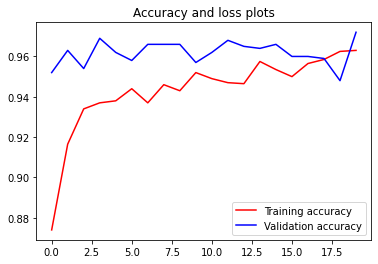

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
# plt.plot(epochs, loss, 'y', label = 'Training loss')
# plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
plt.title('Accuracy and loss plots')
plt.legend(loc=0)
plt.show()